
# Exercise RL1.1: Rescorla Wagner Rule

The next cell shows a code fragment that you need to complete to implement the Rescorla Wagner rule for one stimulus in the function "rescorla_wagner". You can then simulate the following scenarios:

(1) Conditiong and Exctinction: Pavlovian conditiong (100 trials) followed by extinction (100 trials). Use a learning rate of 0.05. Plot reward, weight and error across trials. You can use the provided function "visualize" for this as shown by the second code cell below.

(2) Different learning rates: Study, plot and describe how different learning rates (e.g. 0.01, 0.05 and 0.2) affect conditioning and extinction.

(3) Partial learning: Partial learning with different probabilities for a reward. Simulate 200 trials and plot reward, weight and error across trials for reward probabilities of 0.5 and 0.1 using a learning rate of 0.05. Now extend the simulation to 1000 trials and compute and plot the average weight during the last 900 trials as a function of reward probability between 0 and 1. Predict what happens if you strongly decrease the learning rate and perform the simulation in order to find out whether it confirms your prediction.

Next, write a second function "rescorla_wagner_multiple_stimuli" which can handle scenarios with more then one stimulus. Use this function to simulate the following scenarios:

(4) Blocking: Use the extended function to simulate pre-training and training of blocking with 100 trials for each phase. Plot and interpret the evolution of the weights across trials. Explain how the resulting weights lead to blocking.

(5) Inhibitory: Use the extended rescorla-wagner function to study inhibitory conditioning. In inhibitory conditioning, animals experience one of two different pairings (each with probability 0.5): they either experience the pairing between stimulus s1 and the reward or they experience stimulus s1 and stimulus s2 paired with no reward. Simulate this paradigm for 200 trials. Plot the weights and interpret the results.

In [12]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib notebook

In [13]:
# The following code is used for scenarios 1 to 3.

def rescorla_wagner(reward, epsilon):
    ntrials=len(reward)
    w=np.zeros(ntrials)
    d=np.zeros(ntrials)
    
    for i in range(ntrials-1):
        d[i] = reward[i] - w[i]
        w[i+1] = w[i] + epsilon * d[i]

    return w, d

def visualize(task,w,d):
    plt.plot(task, 'k.', lw=5, label='reward')
    plt.plot(w, 'r.', lw=3, label='weight')
    plt.plot(d,'b.', lw=3, label='Error')
    plt.xlabel('Trial')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    

<IPython.core.display.Javascript object>


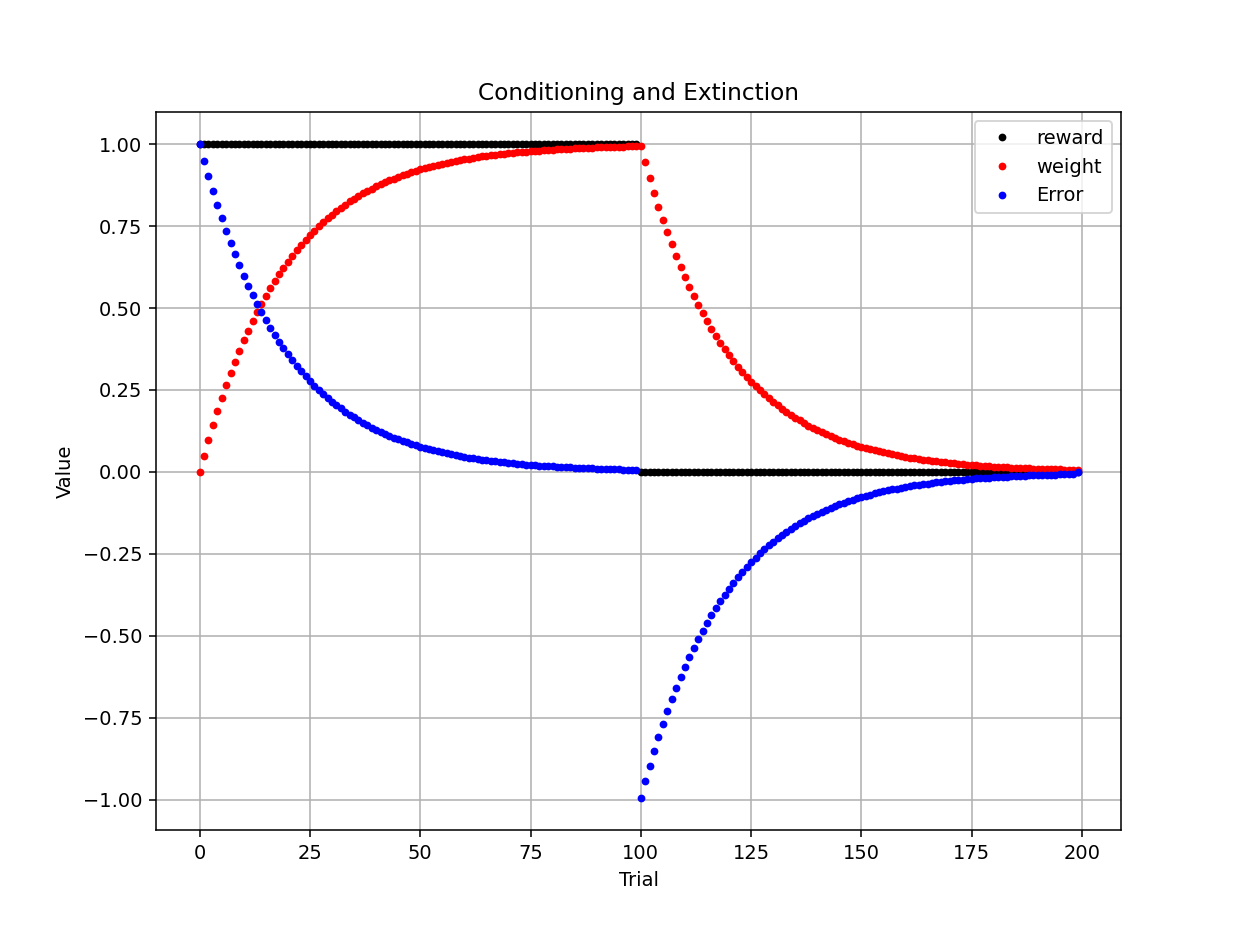

Text(0.5, 1.0, 'Conditioning and Extinction')

In [14]:
# (1) Conditioning and extinction
r1=np.zeros(200); r1[:100]=1.0
w1,d1=rescorla_wagner(r1, 0.05)
plt.figure()
visualize(r1,w1,d1)
plt.title('Conditioning and Extinction')

<IPython.core.display.Javascript object>


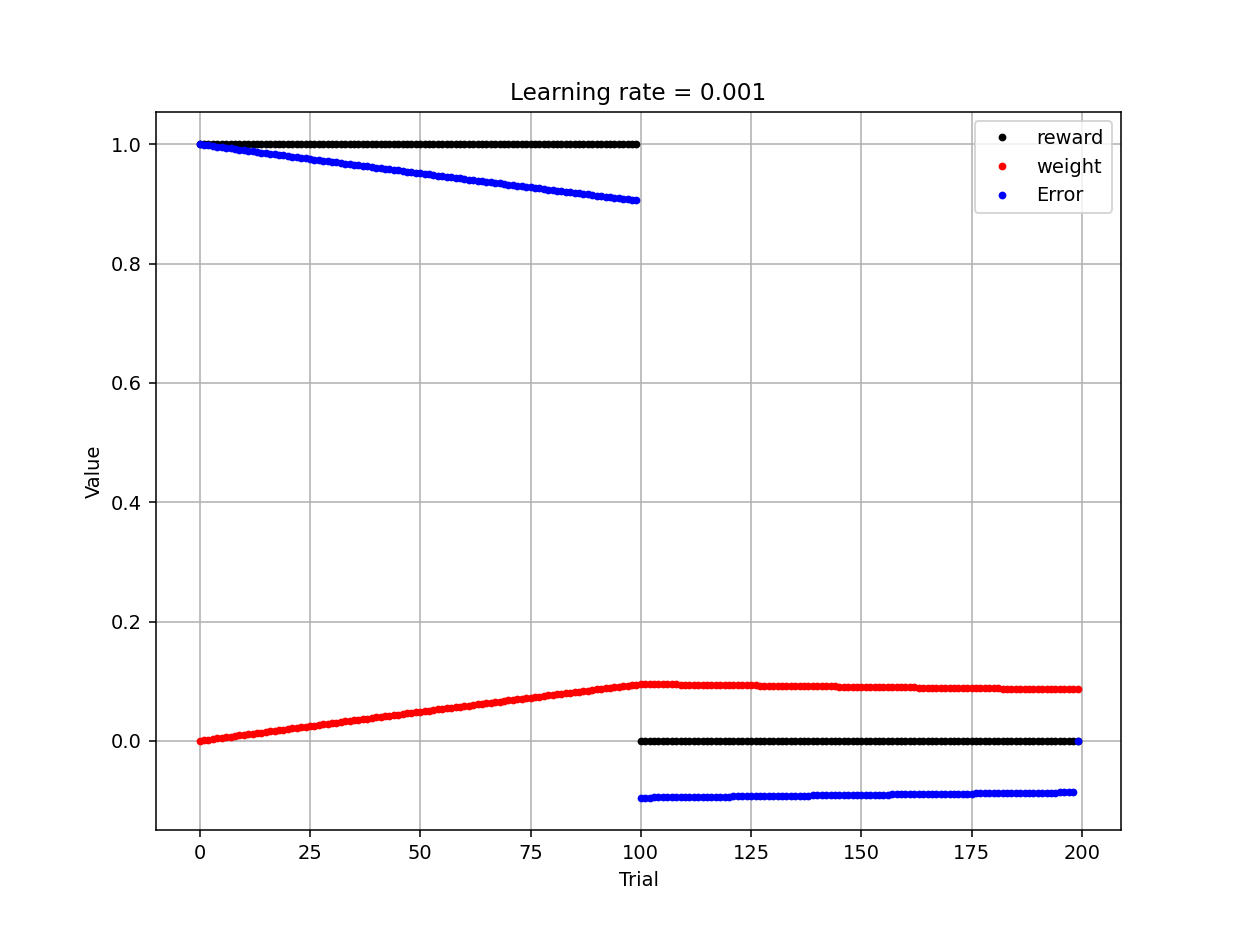

<IPython.core.display.Javascript object>


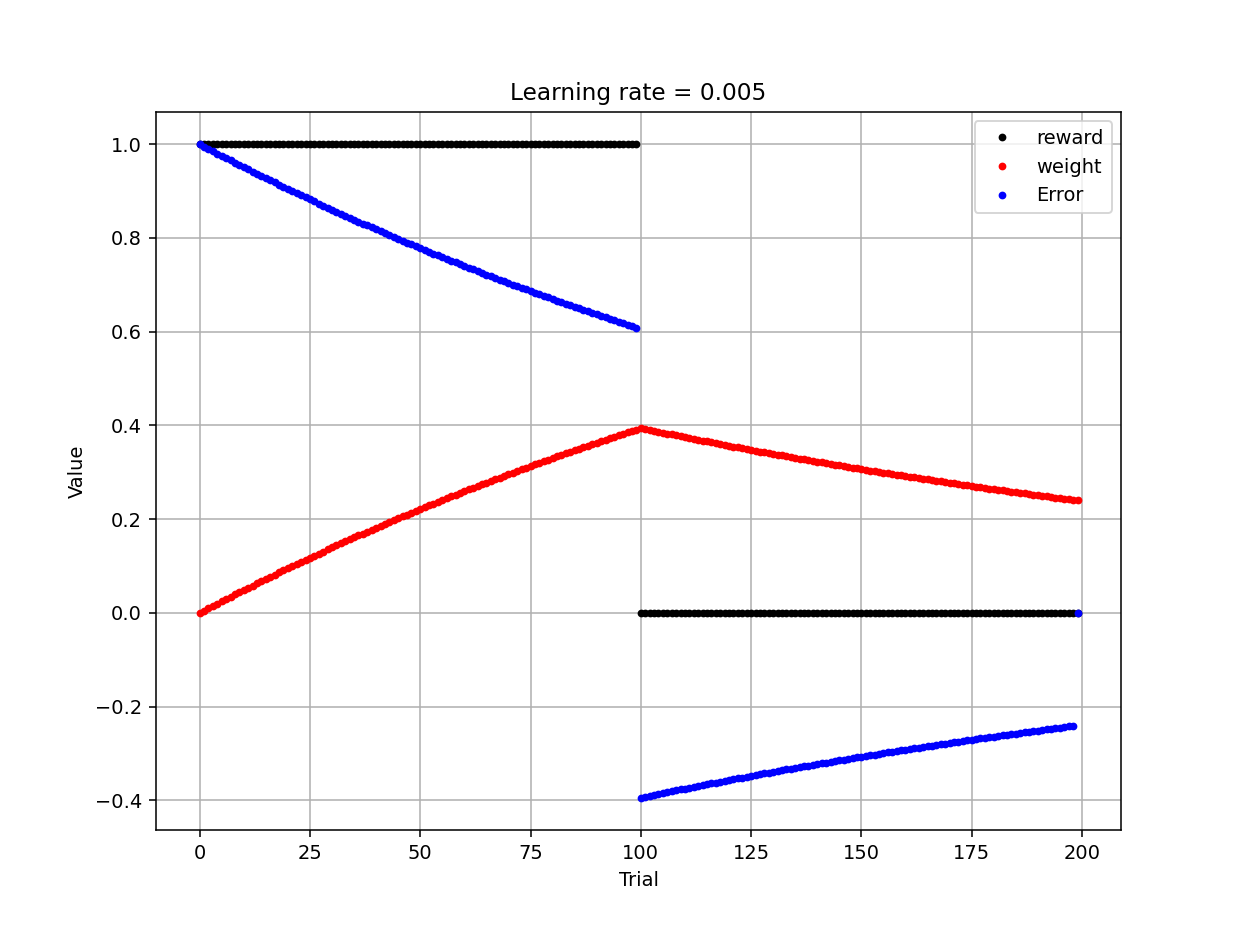

<IPython.core.display.Javascript object>


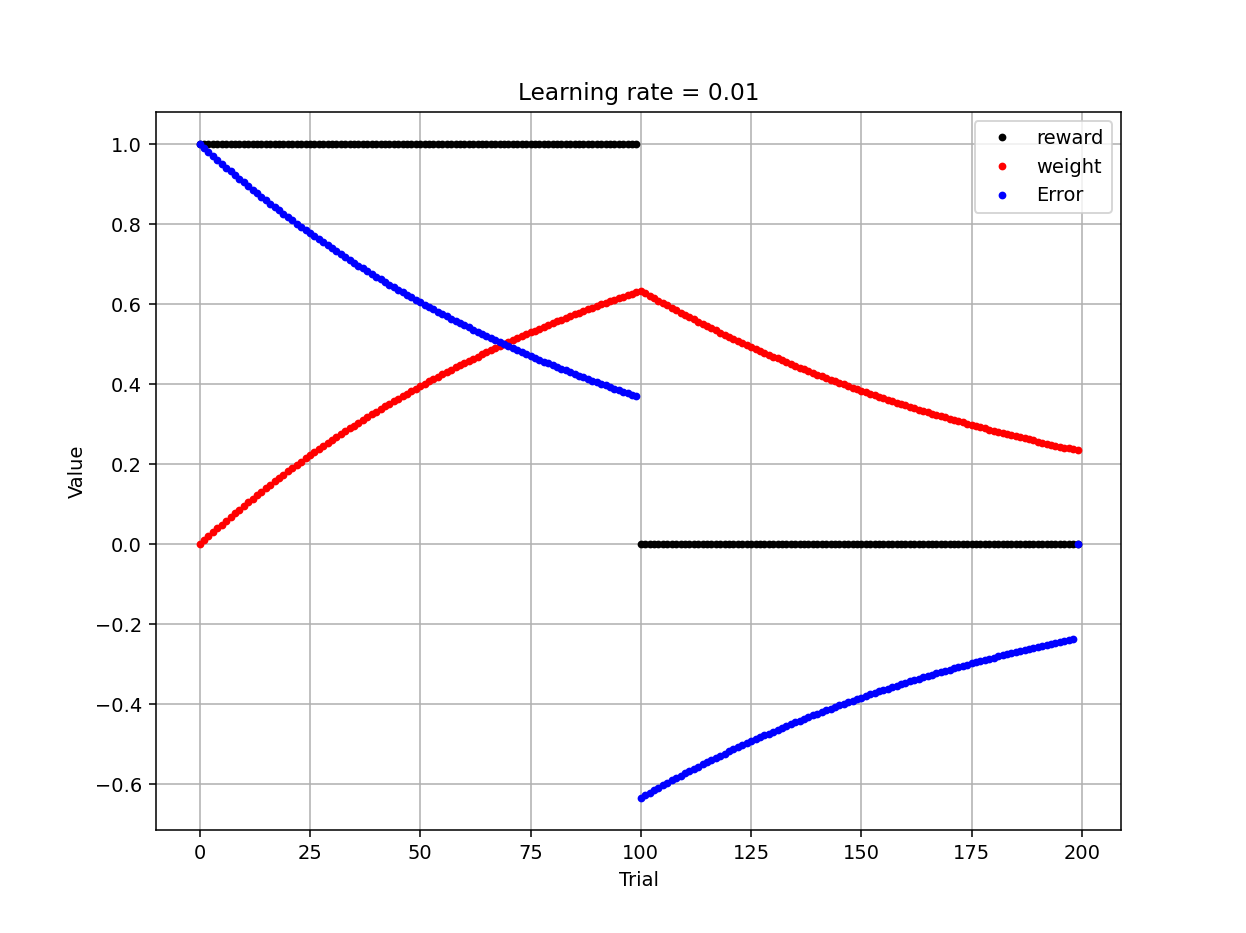

<IPython.core.display.Javascript object>


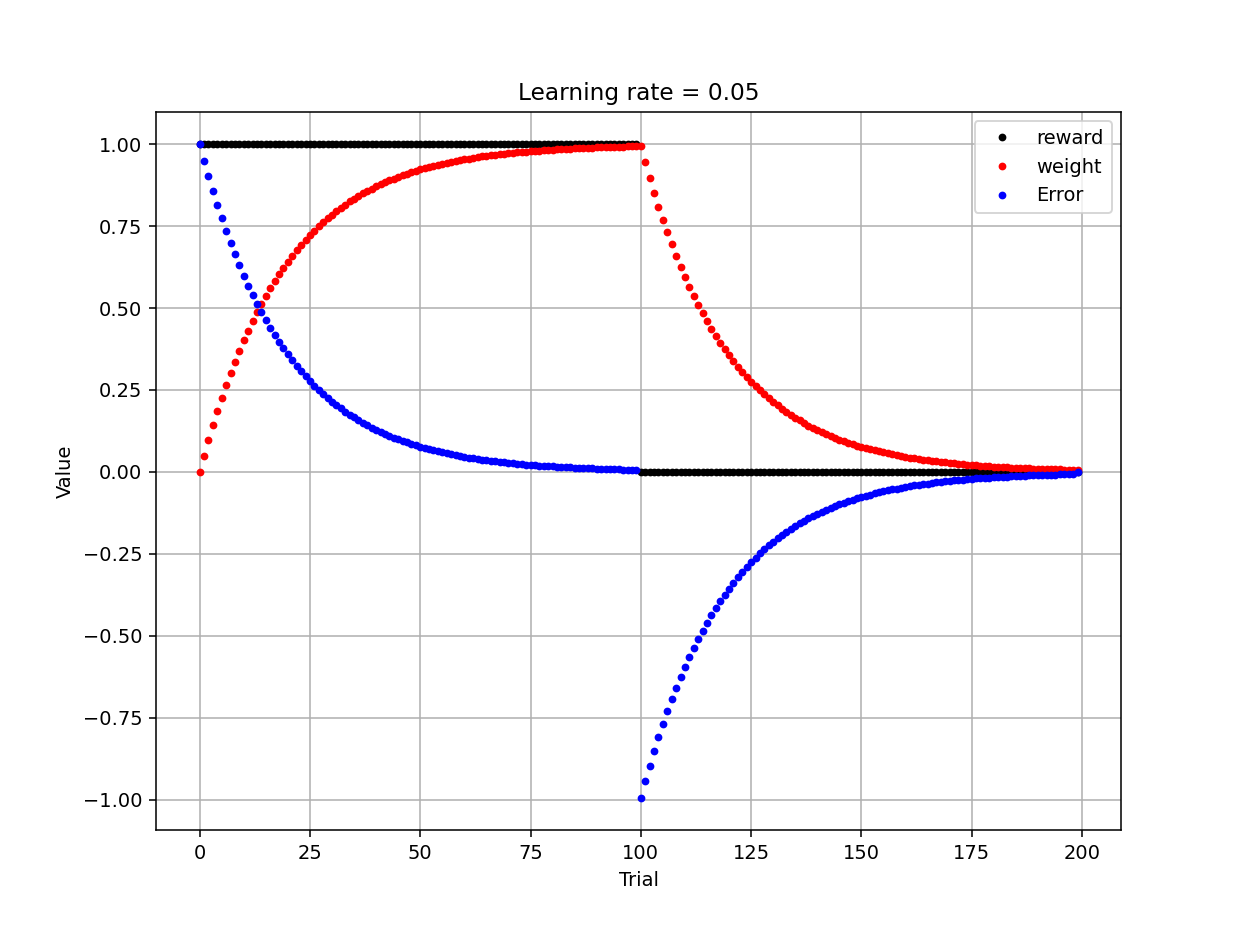

<IPython.core.display.Javascript object>


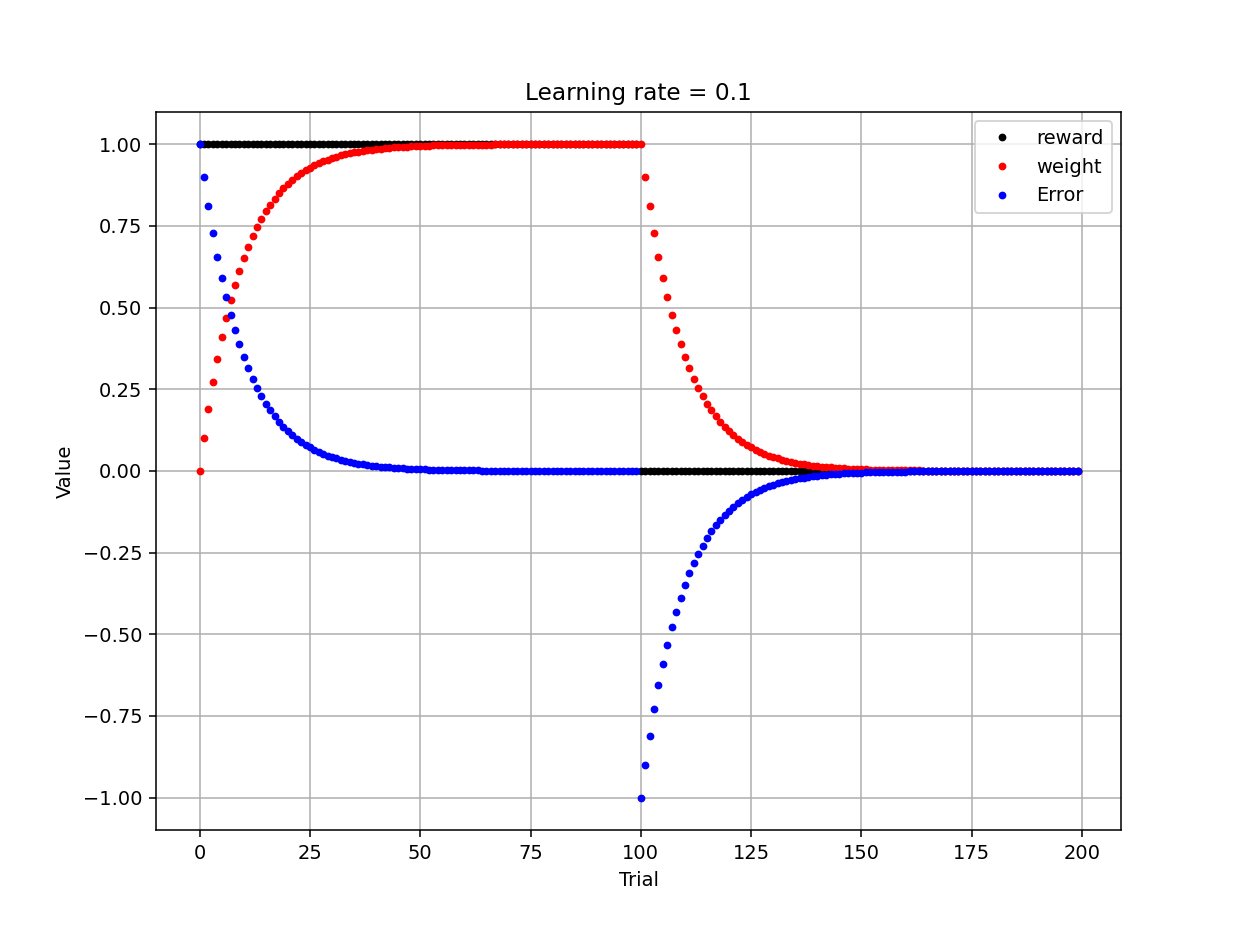

<IPython.core.display.Javascript object>


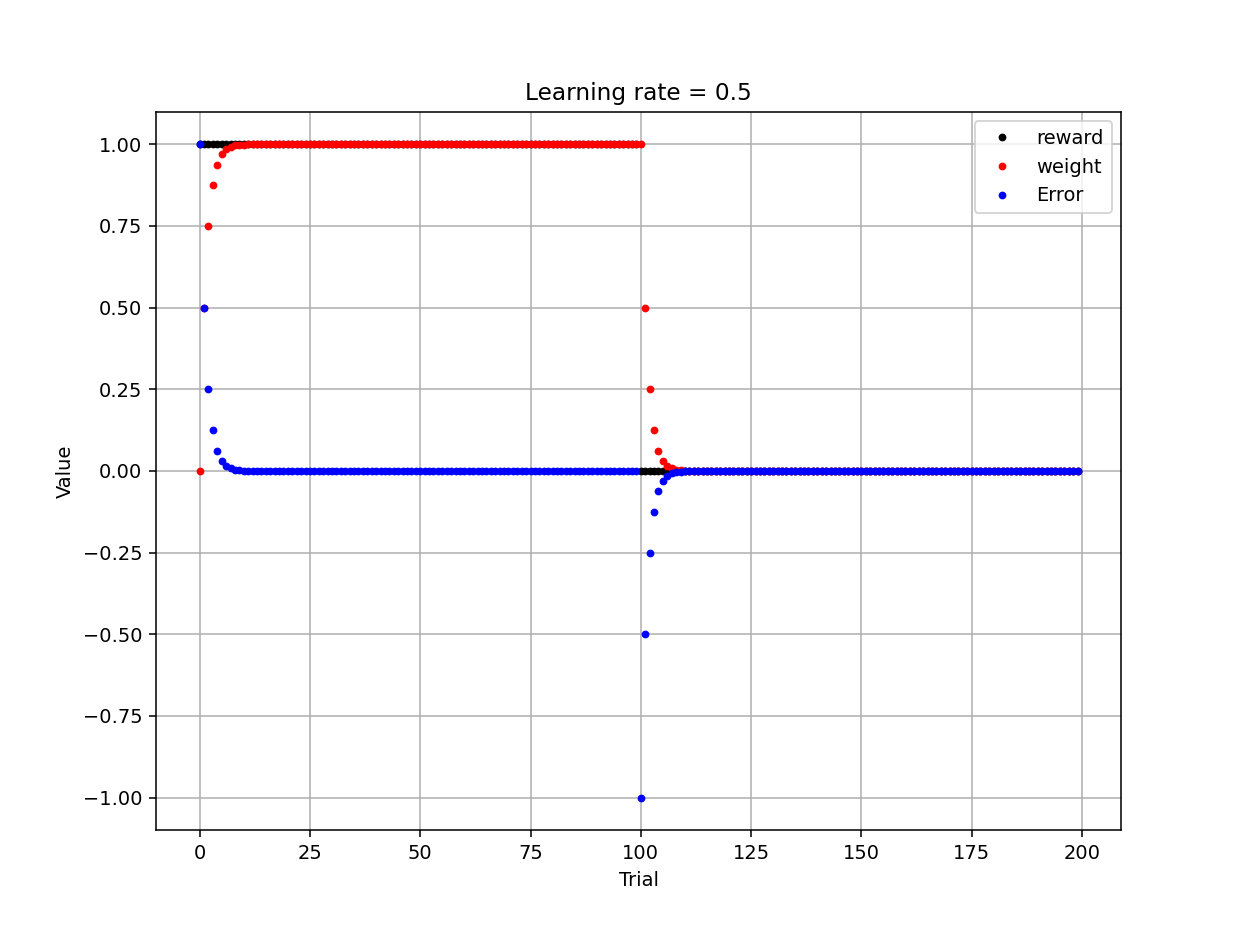

<IPython.core.display.Javascript object>


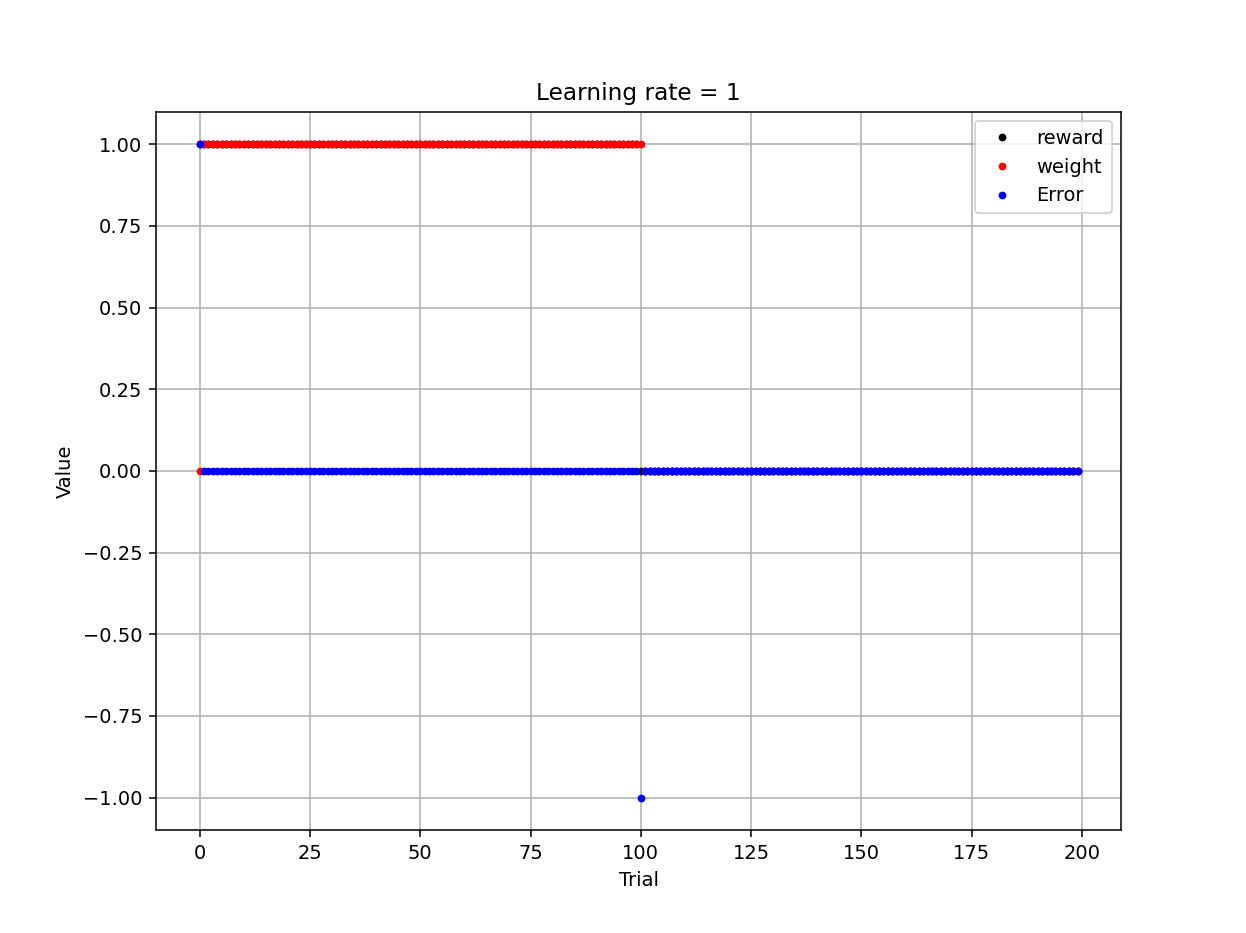

In [15]:
# (2) Different learning rates
epsilons = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

for epsilon in epsilons:
    r2=np.zeros(200); r2[:100]=1.0
    w2,d2=rescorla_wagner(r2, epsilon)
    plt.figure()
    visualize(r2,w2,d2)
    plt.title('Learning rate = {}'.format(epsilon))

<IPython.core.display.Javascript object>


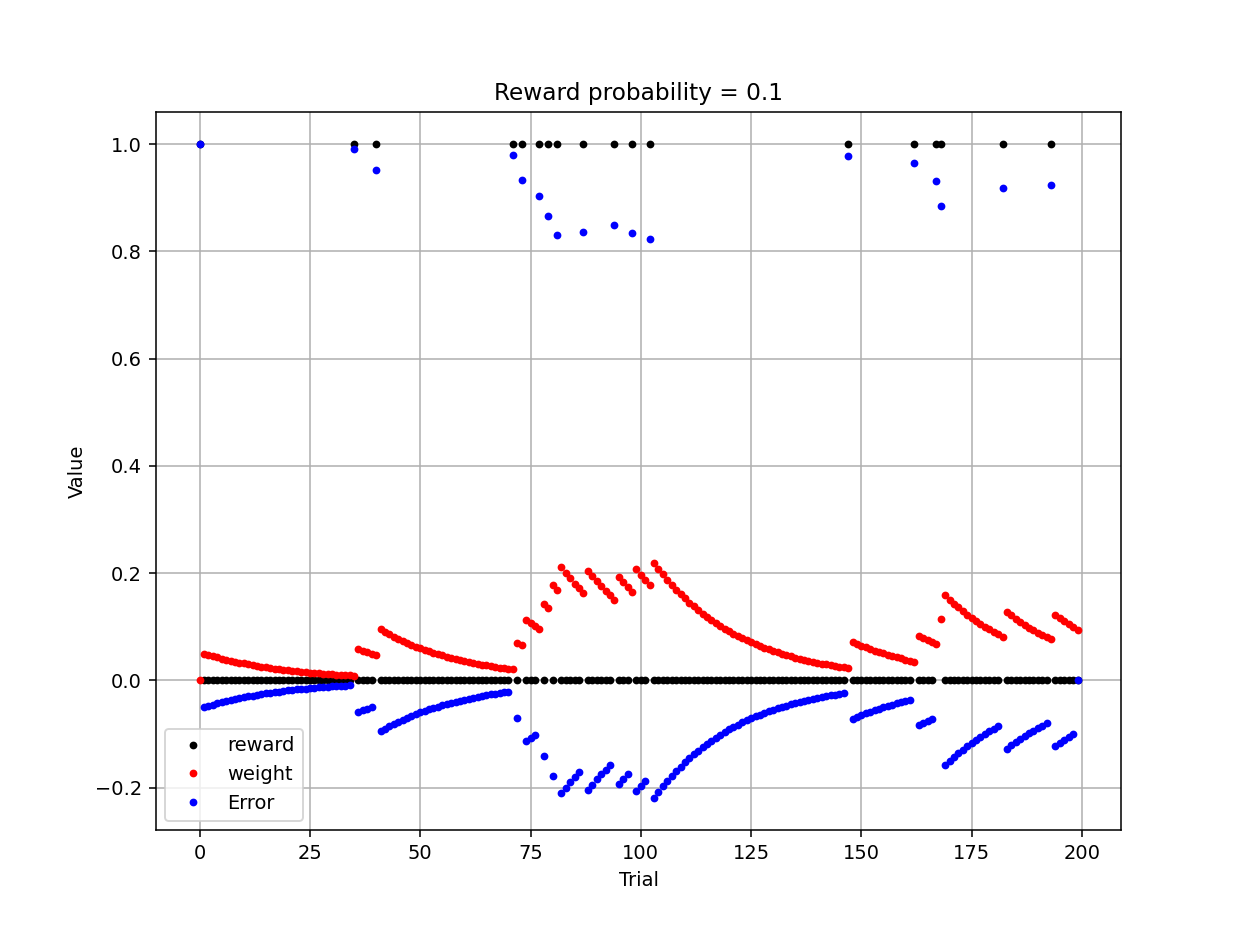

<IPython.core.display.Javascript object>


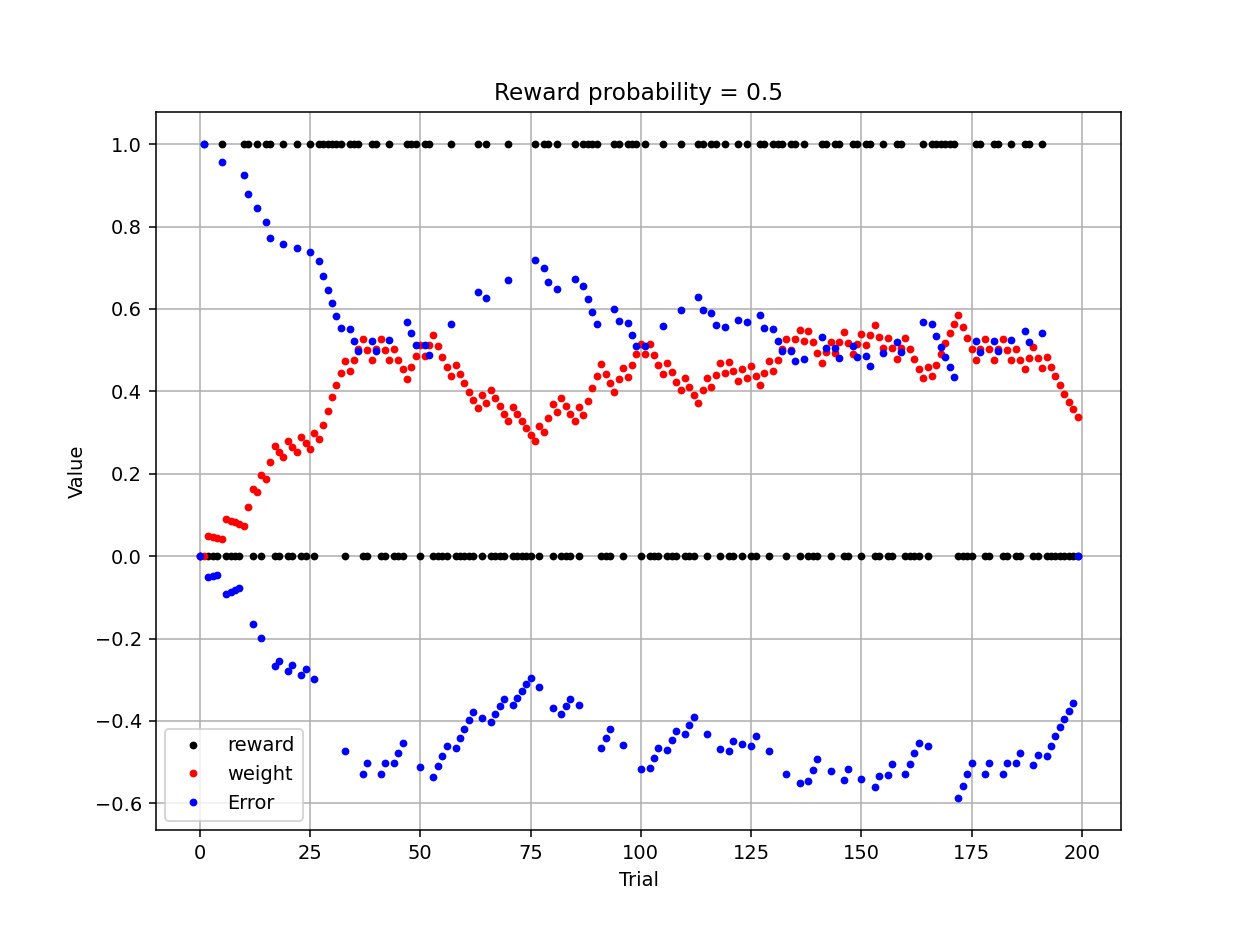

In [16]:
# (3) Partial learning (200 trials)
p_r = [0.1, 0.5]
ntrials = 200
epsilon = 0.05

for p in p_r:
    r3=np.zeros(ntrials)
    for i_trial in range(ntrials):
        trial_p = np.random.rand()
        if trial_p <= p:
            r3[i_trial] = 1
    w3,d3=rescorla_wagner(r3, epsilon)
    plt.figure()
    visualize(r3,w3,d3)
    plt.title('Reward probability = {}'.format(p))

<IPython.core.display.Javascript object>


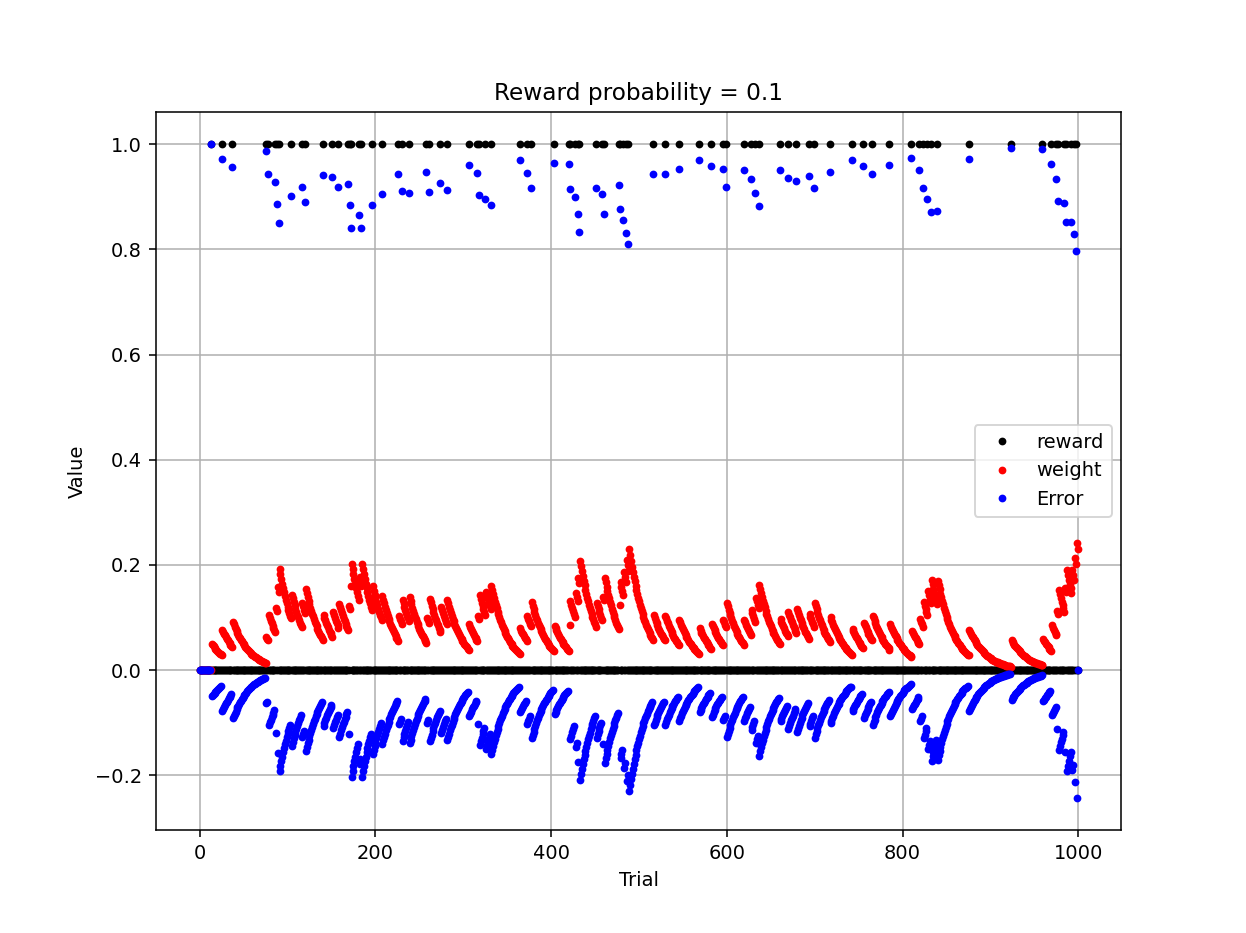

<IPython.core.display.Javascript object>


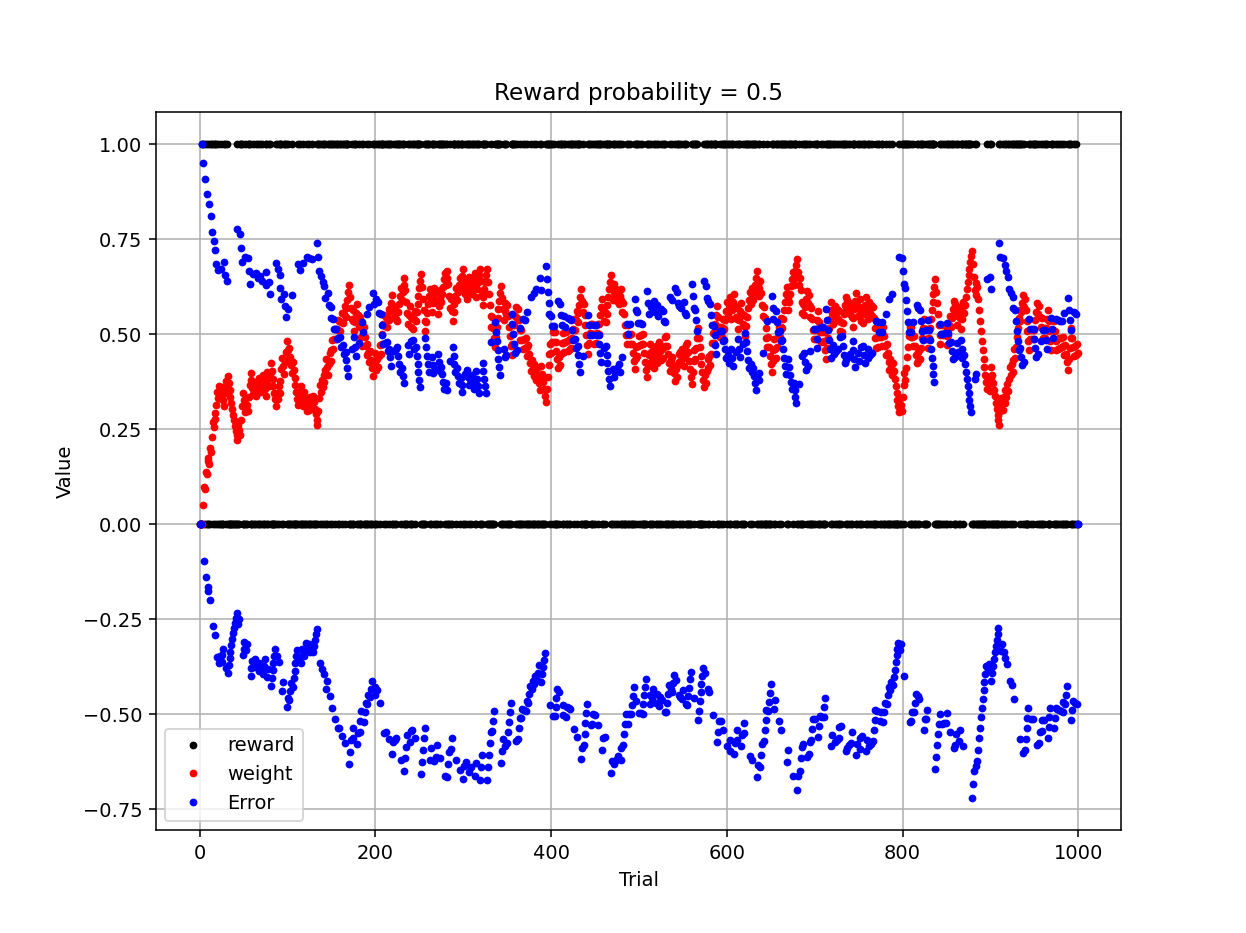

In [17]:
# (3) Partial learning (1000 trials)
p_r = [0.1, 0.5]
ntrials = 1000
epsilon = 0.05
p3=np.zeros(ntrials)

for p in p_r:
    r3=np.zeros(ntrials)
    for i_trial in range(ntrials):
        trial_p = np.random.rand()
        if trial_p <= p:
            r3[i_trial] = 1
        #p3[i_trial] = trial_p
        
    # plot learning
    w3,d3=rescorla_wagner(r3, epsilon)
    plt.figure()
    visualize(r3,w3,d3)
    plt.title('Reward probability = {}'.format(p))

<IPython.core.display.Javascript object>


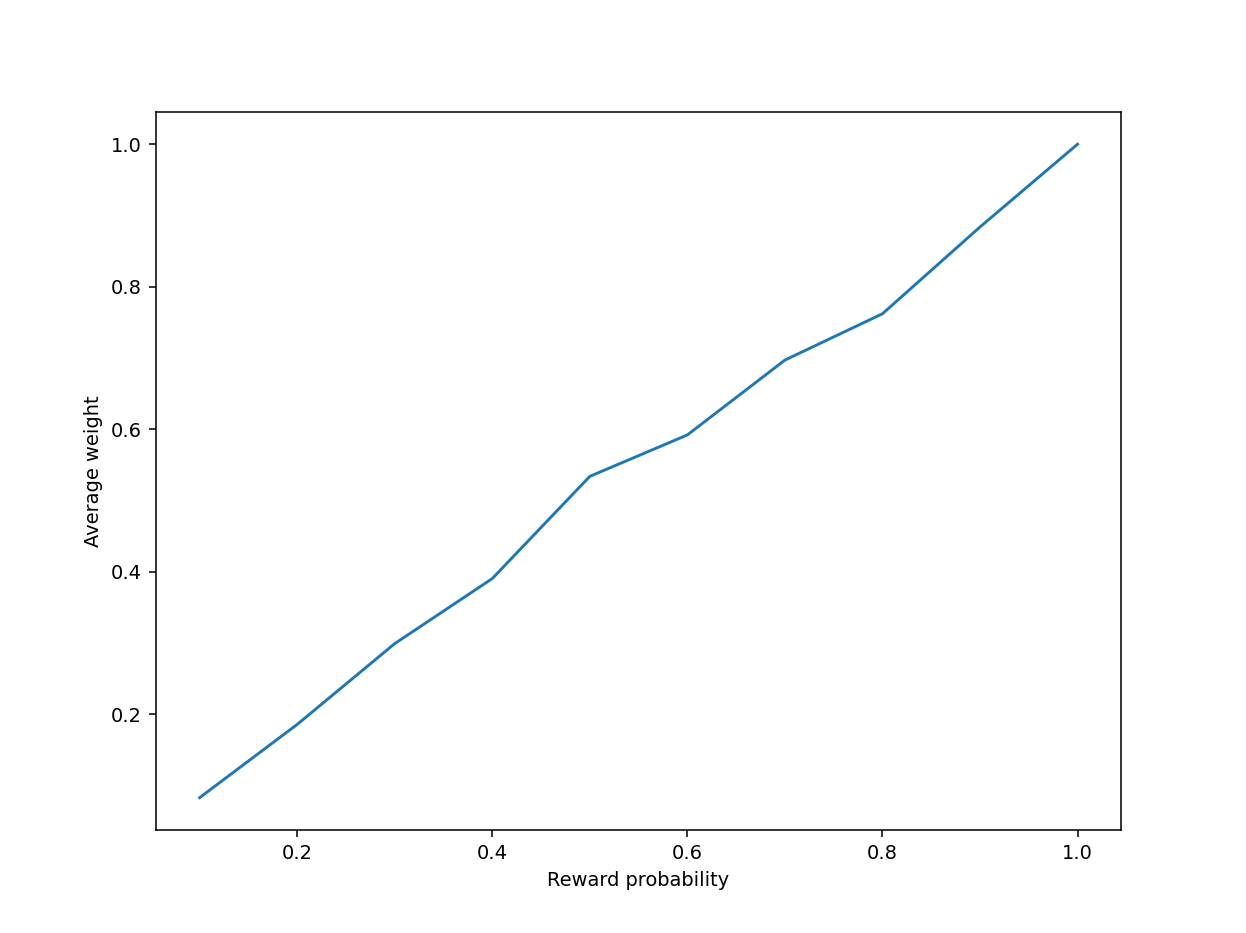

Text(0, 0.5, 'Average weight')

In [18]:
# compute and plot the average weight during the last 900 trials as a function of reward probability between 0 and 1
p_r = np.arange(0.1, 1.1, 0.1)
ntrials = 1000
epsilon = 0.05
p3=np.zeros(ntrials)
w3_avg_all = []

for p in p_r:
    r3=np.zeros(ntrials)
    for i_trial in range(ntrials):
        trial_p = np.random.rand()
        if trial_p <= p:
            r3[i_trial] = 1
    w3,d3=rescorla_wagner(r3, epsilon)
    w3_avg = np.mean(w3[100:1000])
    w3_avg_all.append(w3_avg)

plt.figure()
plt.plot(p_r, w3_avg_all)
plt.xlabel('Reward probability')
plt.ylabel('Average weight')

<IPython.core.display.Javascript object>


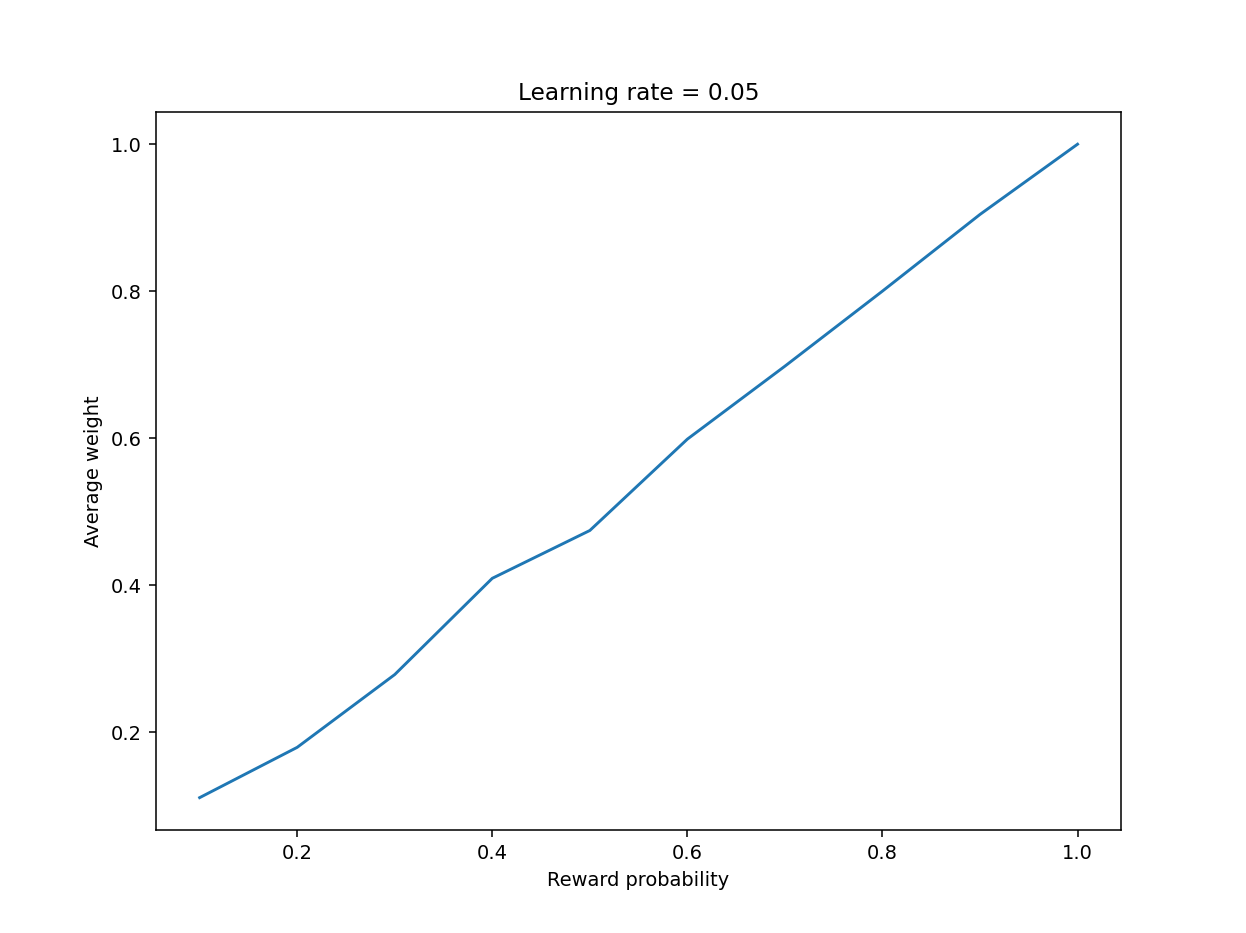

<IPython.core.display.Javascript object>


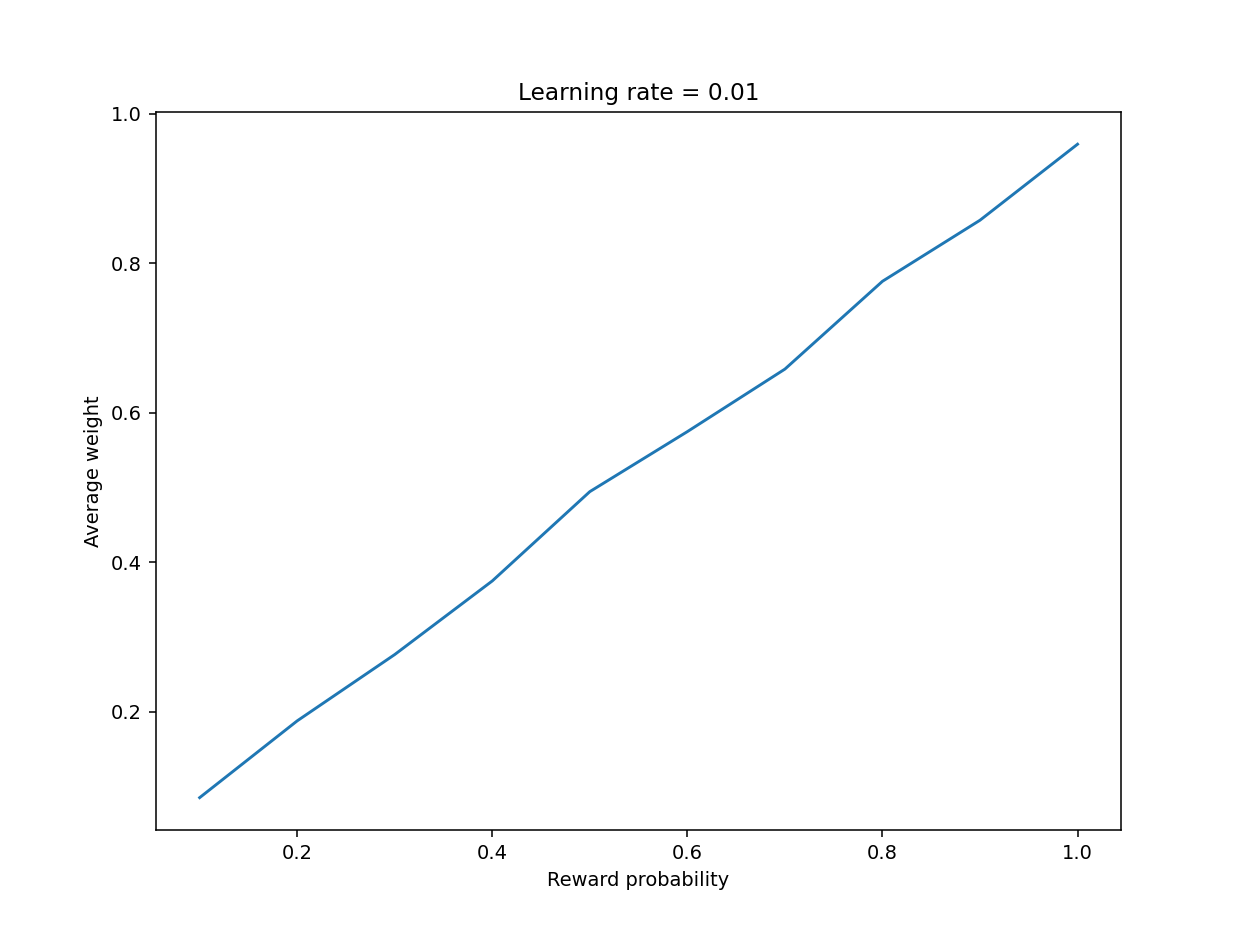

<IPython.core.display.Javascript object>


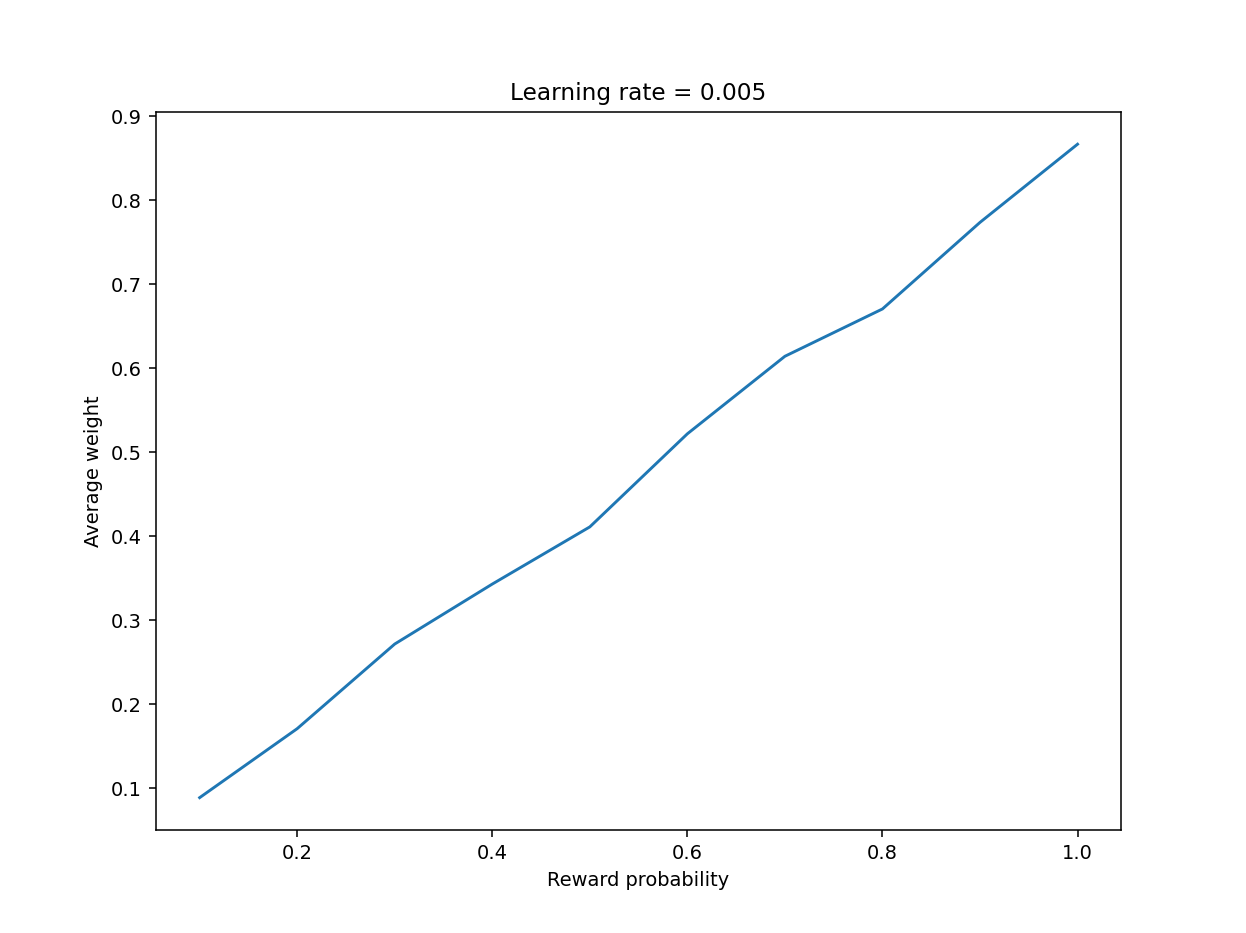

<IPython.core.display.Javascript object>


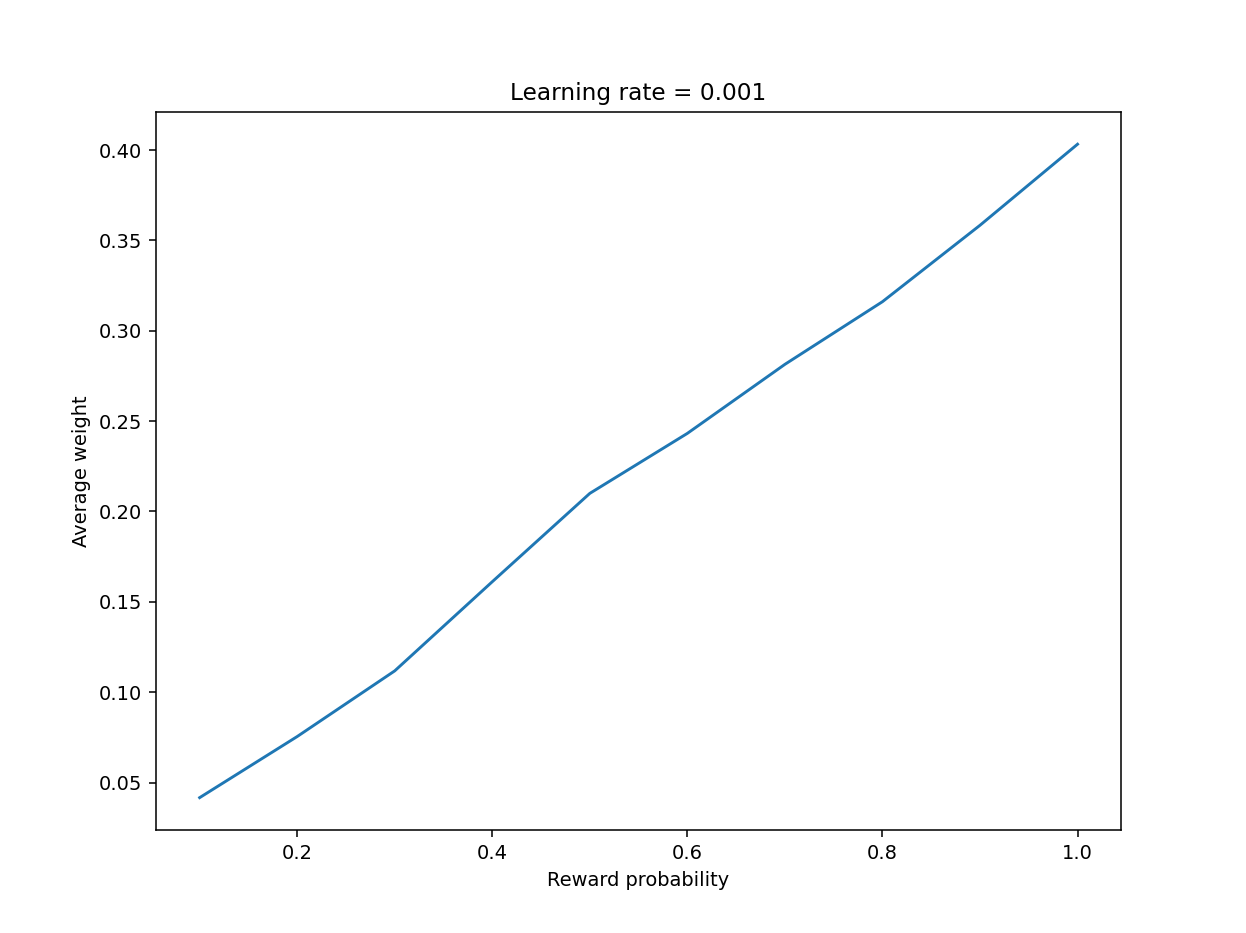

<IPython.core.display.Javascript object>


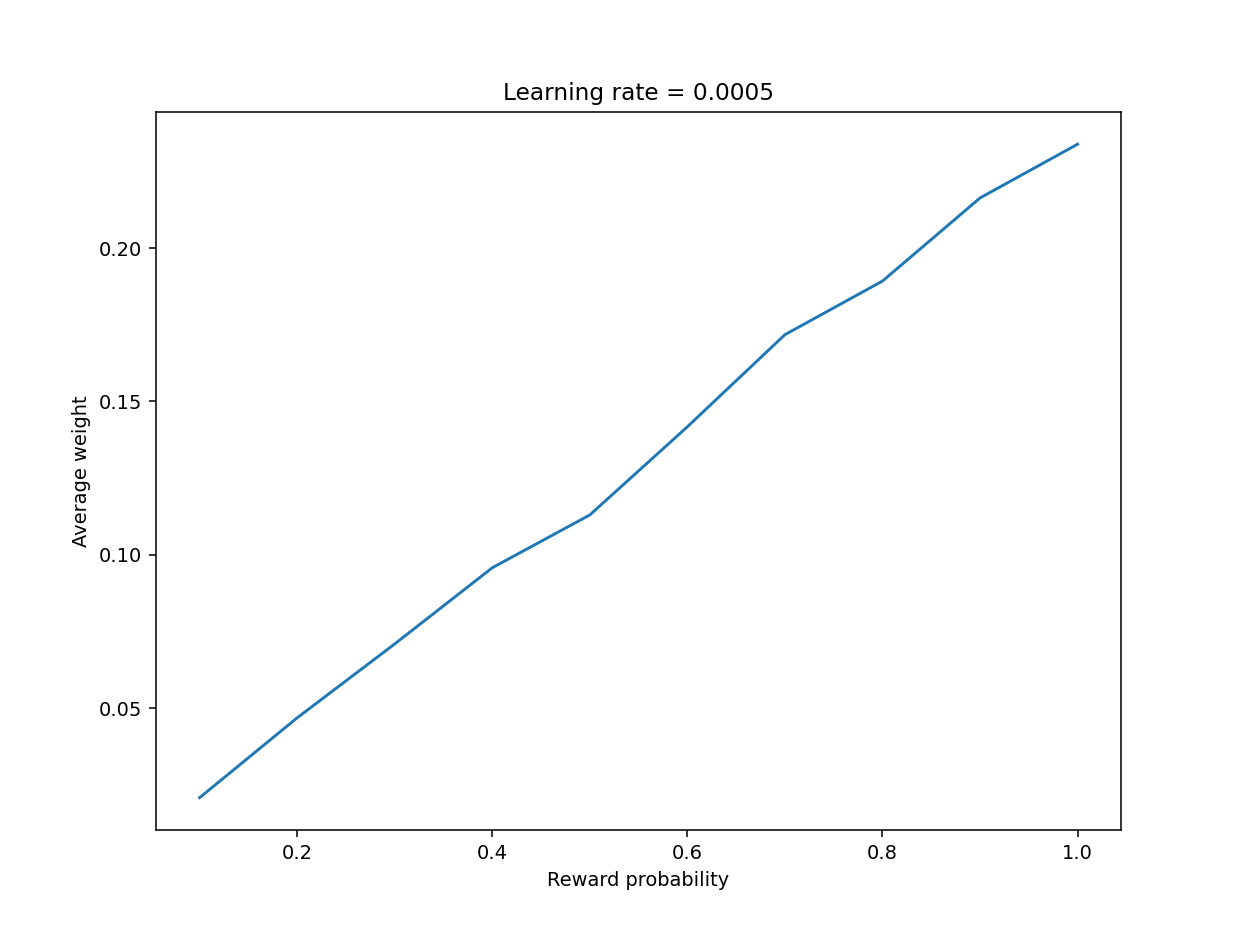

<IPython.core.display.Javascript object>


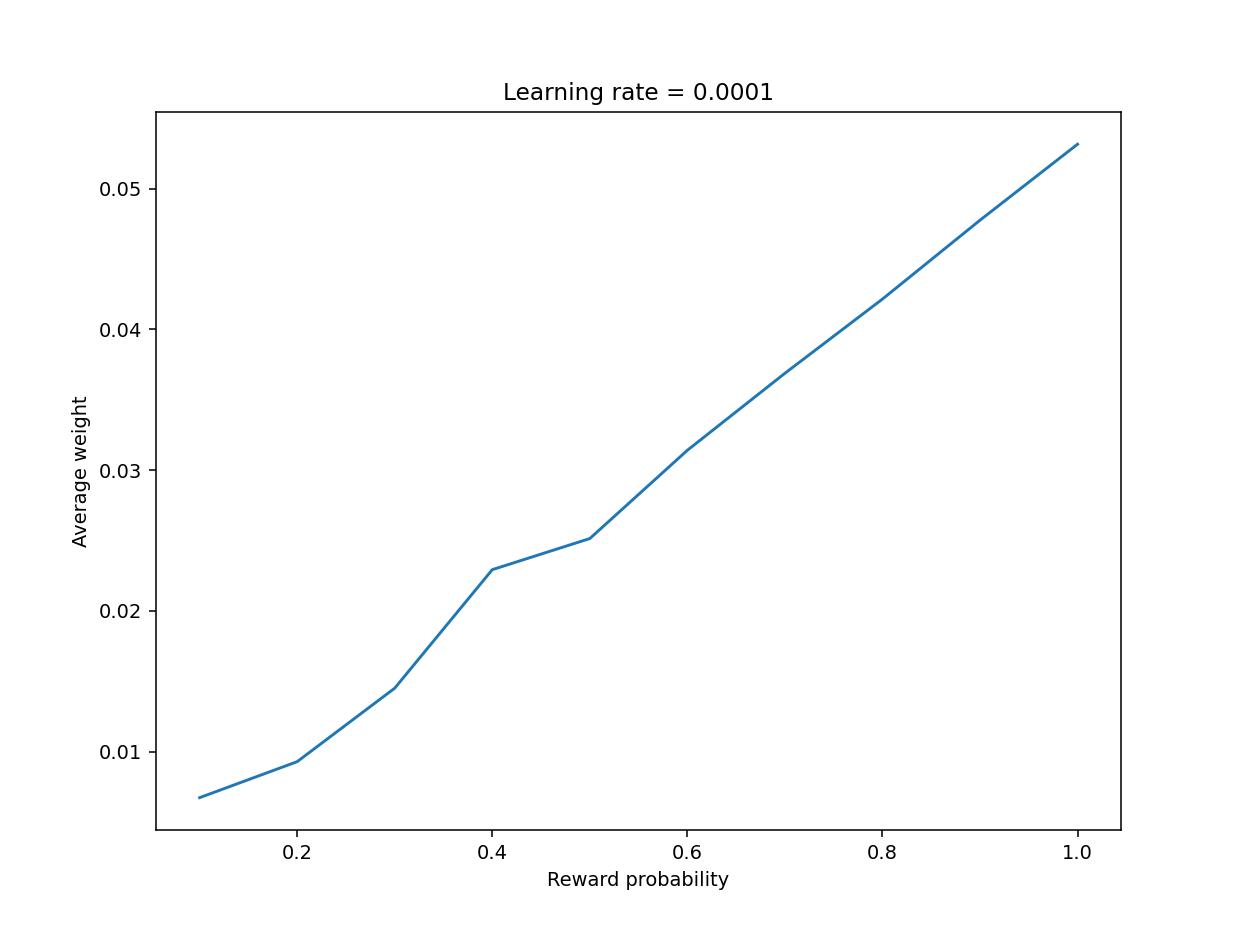

In [19]:
# predict what happens if you strongly decrease the learning rate 
# and perform the simulation in order to find out whether it confirms your prediction
p_r = np.arange(0.1, 1.1, 0.1)
ntrials = 1000
epsilons = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
p3=np.zeros(ntrials)

for epsilon in epsilons:
    w3_avg_all = []
    for p in p_r:
        r3=np.zeros(ntrials)
        for i_trial in range(ntrials):
            trial_p = np.random.rand()
            if trial_p <= p:
                r3[i_trial] = 1
        w3,d3=rescorla_wagner(r3, epsilon)
        w3_avg = np.mean(w3[100:1000])
        w3_avg_all.append(w3_avg)

    plt.figure()
    plt.plot(p_r, w3_avg_all)
    plt.title('Learning rate = {}'.format(epsilon))
    plt.xlabel('Reward probability')
    plt.ylabel('Average weight')

In [20]:
# rescorla_wagner_multiple_stimuli: handle scenarios with more than one stimulus
def rescorla_wagner_multiple_stimuli(reward, u, epsilon):
    ntrials=len(reward)
    nstimuli=u.shape[0]
    v=np.zeros(ntrials)
    w=np.zeros((nstimuli, ntrials))
    d=np.zeros(ntrials)
    
    for i in range(ntrials-1):
        v[i] = w[:, i] @ u[:, i]
        d[i] = reward[i] - v[i]
        w[:, i+1] = w[:, i] + epsilon * d[i] * u[:, i]

    return w, d

<IPython.core.display.Javascript object>


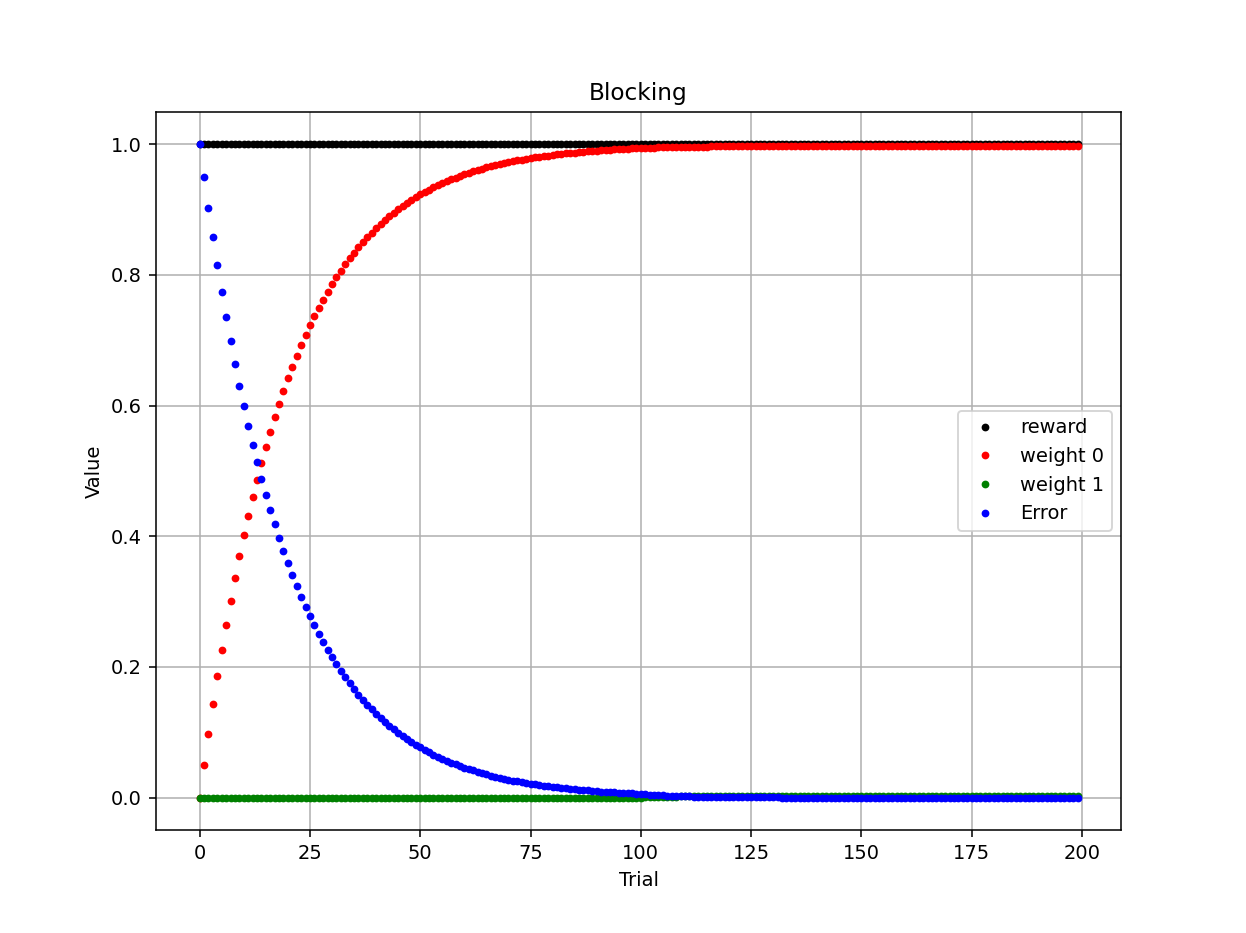

In [21]:
# (4) Blocking

# Use the extended function to simulate pre-training and training of blocking with 100 trials for each phase. 
ntrials = 200
epsilon = 0.05

r4=np.full(ntrials, 1)
u4=np.concatenate((np.ones(n_trials), np.concatenate((np.zeros(ntrials//2), np.ones(ntrials//2))))).reshape(2, -1)
w4,d4=rescorla_wagner_multiple_stimuli(r4, u4, epsilon)

# Plot and interpret the evolution of the weights across trials.
plt.figure()
plt.plot(r4, 'k.', lw=5, label='reward')
plt.plot(w4[0, :], 'r.', lw=3, label='weight 0')
plt.plot(w4[1, :], 'g.', lw=3, label='weight 1')
plt.plot(d4,'b.', lw=3, label='Error')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.legend()
plt.title('Blocking')
plt.grid(True)

<ipython-input-30-3d1989eb44cd>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


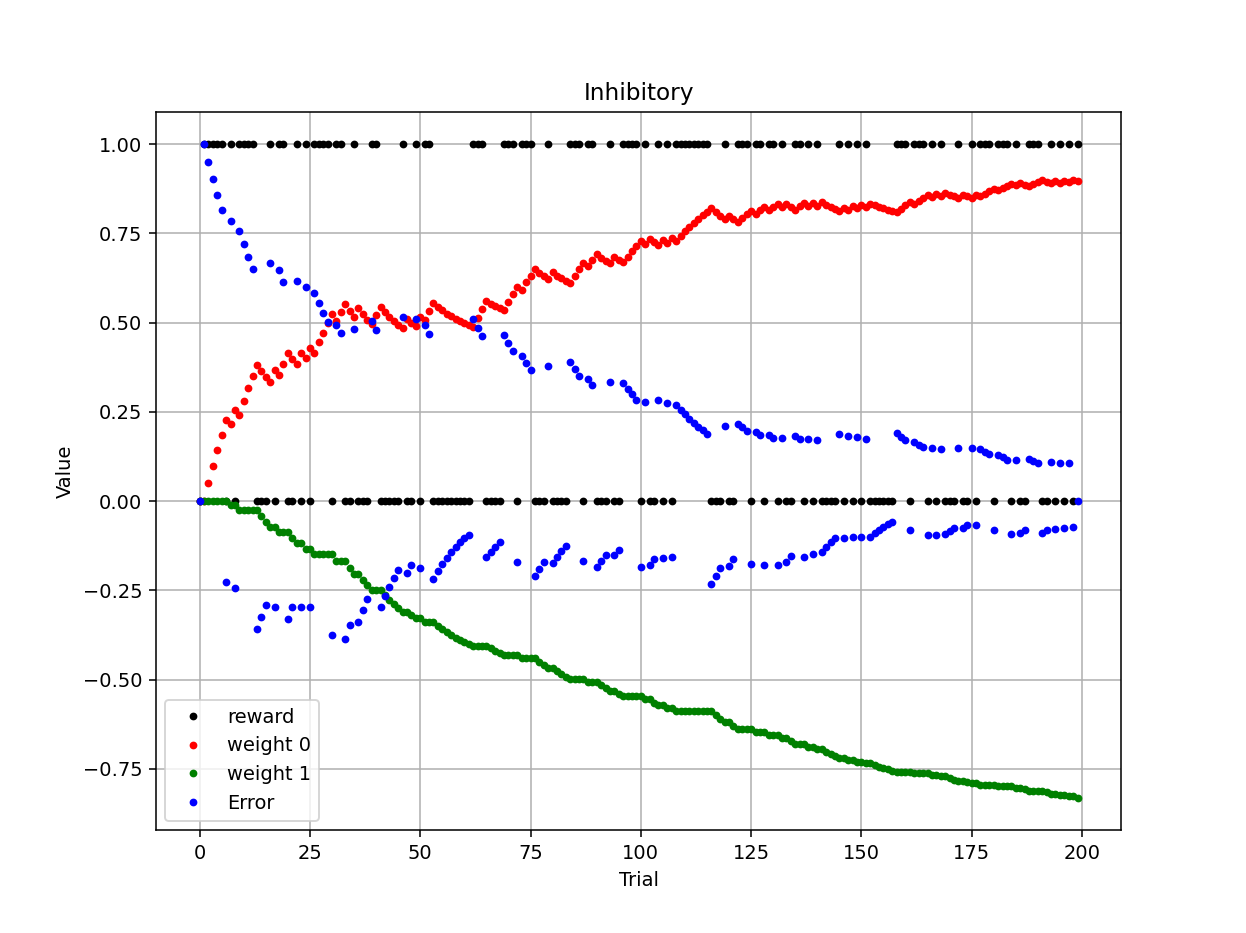

In [30]:
# (5) Inhibitory
ntrials = 200
epsilon = 0.05


r5=np.zeros(ntrials)
u5=np.zeros((2, ntrials))

for i in range(ntrials):
    p=np.random.rand()
    if p<=0.5:
        r5[i]=1
        u5[0,i]=1
    else:
        u5[:,i]=1

w5,d5=rescorla_wagner_multiple_stimuli(r5, u5, epsilon)


plt.figure()
plt.plot(r5, 'k.', lw=5, label='reward')
plt.plot(w5[0, :], 'r.', lw=3, label='weight 0')
plt.plot(w5[1, :], 'g.', lw=3, label='weight 1')
plt.plot(d5,'b.', lw=3, label='Error')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.legend()
plt.title('Inhibitory')
plt.grid(True)

In [29]:
print(r5)
print(u5)
print(d5)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0.]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 